<a href="https://colab.research.google.com/github/Foultank10/Exploratory-data-analysis_Car-Features-and-MSRP_Internship_Project/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Context**

As a data scientist, the majority of your time will be spent on data pre-processing i.e. making sure you have the right data in the right format. Once this is done, you get a sense of your dataset through applying some descriptive statistics and then, you move on to the exploration stage wherein you plot various graphs and mine the hidden insights. In this project, you as a data scientist are expected to perform Exploratory data analysis on how the different features of a car and its price are related. The data comes from the Kaggle dataset "Car Features and MSRP". It describes almost 12,000 car models, sold in the USA between 1990 and 2017, with the market price (new or used) and some features.

# **Objective**
The objective of the project is to do data pre-processing and exploratory data analysis of the dataset.

# **Exploratory data analysis**
Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

## **1.Importing Required Libraries For EDA**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns #visualizations
import matplotlib.pyplot as plt #visualizations
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **1.1 Loading dataset into colab**

In [3]:
#to load dataset in google colab
from google.colab import files
uploaded=files.upload()

Saving data.csv to data.csv


# **1.2 Loading the data into data frame**

In [4]:
#method to load csv files in colab
import io
df=pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [5]:
#to display first five rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
#to display bottom 5 rows
df.tail(5)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


# **1.3 Checking the types of data and summary stats**

In [8]:
#used to check datatype of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [9]:
#describe function gives the statistical  measures of the numerical values.
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# **2.Dropping Irrelevant Columns**

This step is very important in EDA because there are some columns which are never used so it useful to drop them from dataset

In [11]:
#dropping the Irrelevant columns from dataset
df=df.drop(['Engine Fuel Type','Number of Doors','Market Category'],axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# **3.Renaming the Columns**

In [14]:
#Renaming the Columns
df=df.rename(columns={ "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# **4.Dropping Duplicate rows**

Our dataset has more than 10,100 rows in which many rows can be duplicate ao we have to remove them

In [16]:
#to know the shape of dataframe
df.shape


(11914, 13)

In [20]:
#finding duplicate rows
duplicate_rows_df=df[df.duplicated()]
print('Number of duplicate rows',duplicate_rows_df.shape)

Number of duplicate rows (792, 13)


In [21]:
#dropping duplicate values
df=df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [22]:
df.shape

(11122, 13)

## **4.1 Dropping the Missing Values**

In [24]:
#checking count of null values in each column
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [26]:
#dropping Missing Values
df=df.dropna() 
df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [27]:
#checking if all the null values are removed or not
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


# **5.Detecting Outliers**

Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.

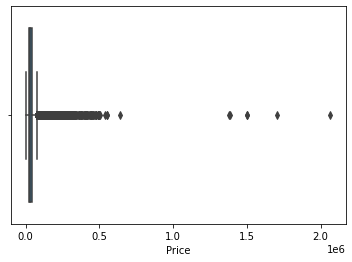

In [29]:
#boxplot of Price
sns.boxplot(x=df['Price'])

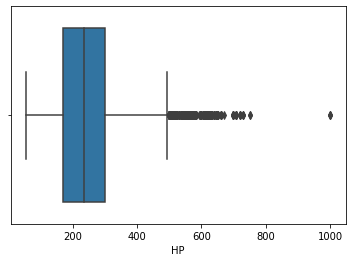

In [30]:
#boxplot of Horse Power
sns.boxplot(x=df['HP'])

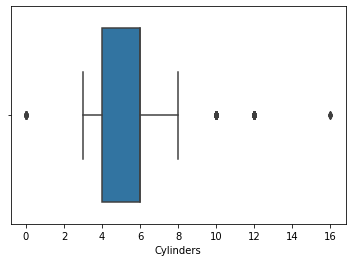

In [31]:
sns.boxplot(x=df['Cylinders'])

IQR

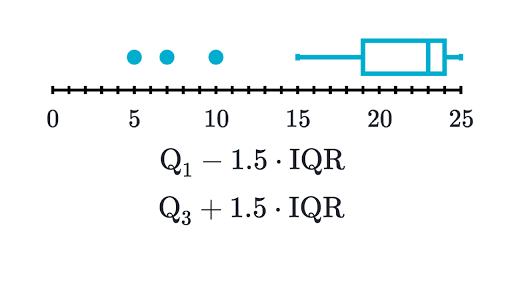

In [32]:
#Calculating the IQR range, for each column
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [33]:
#Removing Outliers
df=df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 +1.5 * IQR))).any(axis=1)]
df.shape

(8546, 13)

# **6.What are the most represented car brands**

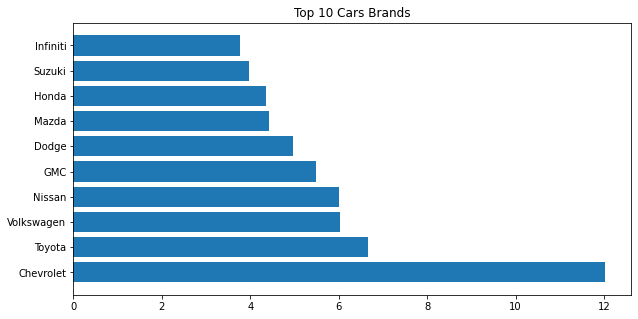

In [34]:
#percentage of cars per brand
counts=df['Make'].value_counts()*100/sum(df['Make'].value_counts())

#Top 10 Car brands
popular_labels=counts.index[:10]

#plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels,width=counts[:10])
plt.title("Top 10 Cars Brands")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


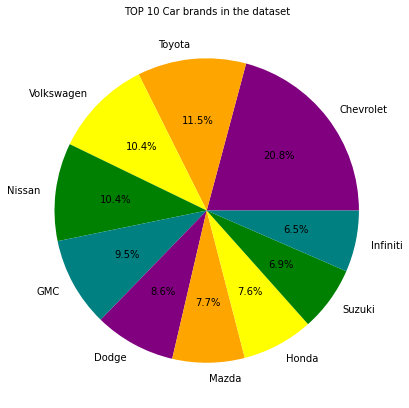

In [119]:
#Plotting a pie chart representing the distribution among the top 10 selling brands.
carr=df['Make'].value_counts().head(5).to_frame()
m= carr.style.background_gradient(cmap='Blues')
colors=['purple','orange','yellow','green','teal','purple','orange','yellow','green','teal']
labels= ['Chevrolet','Toyota','Volkswagen','Nissan', 'GMC','Dodge','Mazda','Honda','Suzuki','Infiniti']
sizes= ['1027','569','515','513','469','425','378','373','339','322']
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
values=df['Make'].value_counts().head(10).to_frame()

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=None,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('TOP 10 Car brands in the dataset',color='black',fontsize=10)
plt.show()

# **6.1 Average price among the top car brands**

In [120]:
#finding the average price of top 10 car brands
prices=df[['Make','Price']].loc[(df['Make']=='Chevrolet') |(df['Make']=='Ford') |(df['Make']=='Volkswagen') |(df['Make']=='Toyota') |(df['Make']=='Dodge') | (df['Make']=='Nissan') | (df['Make']=='GMC') | (df['Make']=='Honda') |(df['Make']=='Mazda')].groupby('Make').mean()
#printing average price of top 10 car brands
prices

,Price
Make,
Chevrolet,28142.855891
Dodge,26076.722353
GMC,33261.400853
Honda,27381.364611
Mazda,20495.820106
Nissan,28352.543860
Toyota,27769.421793
Volkswagen,29032.817476


# **7. Correlation Matrix**
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses

In [36]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


# **Insights**
We can clearly see high correlation between cylinders and HP&  highway mpg and city mpg this also states that more number of cylinder car will be more powerful

High Anti correlation can be seen between cylinders & MPG

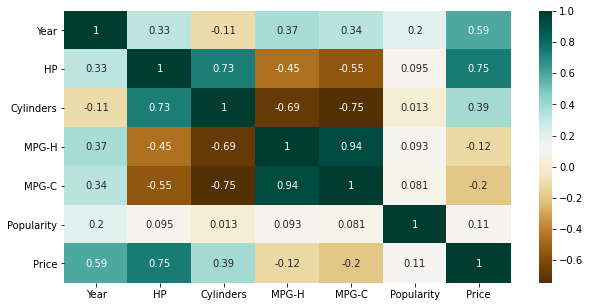

In [38]:
#plotting the heatmap of correlation to perfectly visualize correlations between the columns
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,cmap='BrBG', annot=True)

# **8.Perform EDA and plot different graphs and document your findings**


# **Scatterplot**

A scatterplot is a type of data display that shows the relationship between two numerical variables. Each member of the dataset gets plotted as a point whose x-y coordinates relates to its values for the two variables.

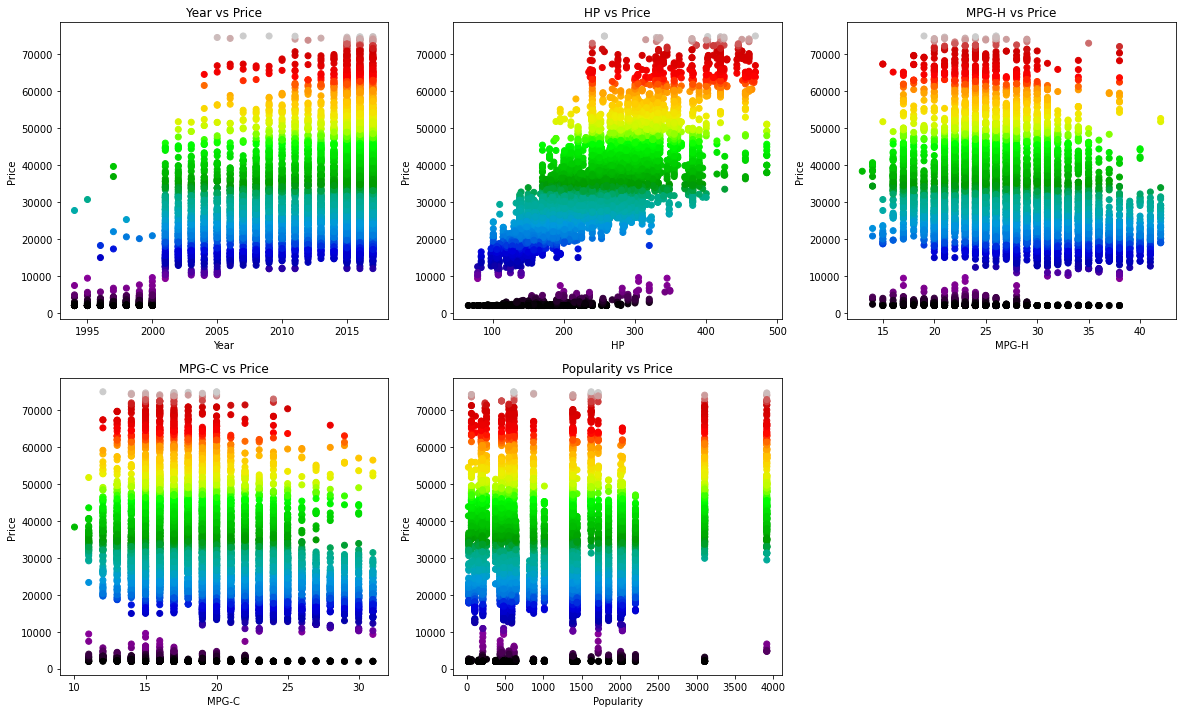

In [125]:
#Plotting the boxplots of each continuous variable
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
plt.title("Year vs Price")
plt.scatter(df["Year"], df["Price"],c=df['Price'], cmap='nipy_spectral')
plt.xlabel("Year")
plt.ylabel("Price")

plt.subplot(2,3,2)
plt.title("HP vs Price")
plt.scatter(df["HP"], df["Price"],c=df['Price'], cmap='nipy_spectral')
plt.xlabel("HP")
plt.ylabel("Price")

plt.subplot(2,3,3)
plt.title("MPG-H vs Price")
plt.scatter(df["MPG-H"], df["Price"],c=df['Price'], cmap='nipy_spectral')
plt.xlabel("MPG-H")
plt.ylabel("Price")

plt.subplot(2,3,4)
plt.title("MPG-C vs Price")
plt.scatter(df["MPG-C"], df["Price"],c=df['Price'], cmap='nipy_spectral')
plt.xlabel("MPG-C")
plt.ylabel("Price")

plt.subplot(2,3,5)
plt.title("Popularity vs Price")
plt.scatter(df["Popularity"], df["Price"],c=df['Price'], cmap='nipy_spectral')
plt.xlabel("Popularity")
plt.ylabel("Price")

plt.show()

We can see HP is most correlated feature with price

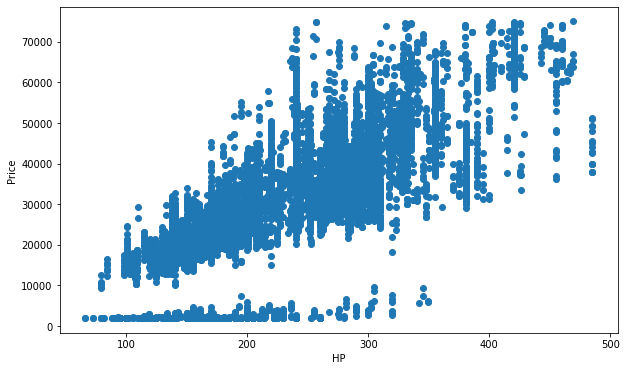

In [41]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df['HP'],df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()
#we can see linear relationship between HP and Price

# **Which vehicle Style Segment sold Most?**

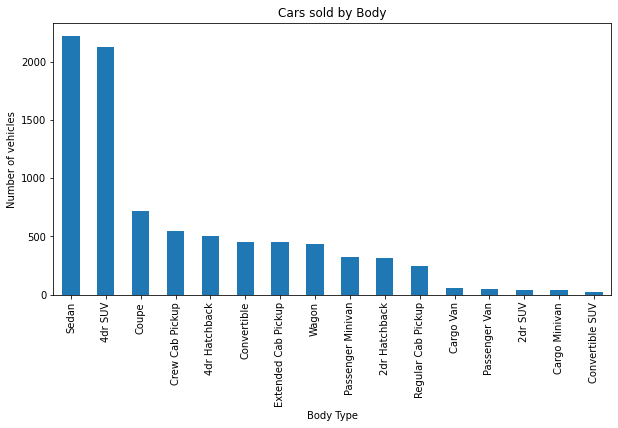

In [45]:
df['Vehicle Style'].value_counts().plot.bar(figsize=(10,5))
plt.title('Cars sold by Body')
plt.ylabel("Number of vehicles")
plt.xlabel("Body Type")
plt.show()

from above plot we can conclude that Sedan is most sold car followed by 4dr suv

Text(0.5, 0, 'Count of vehicles')

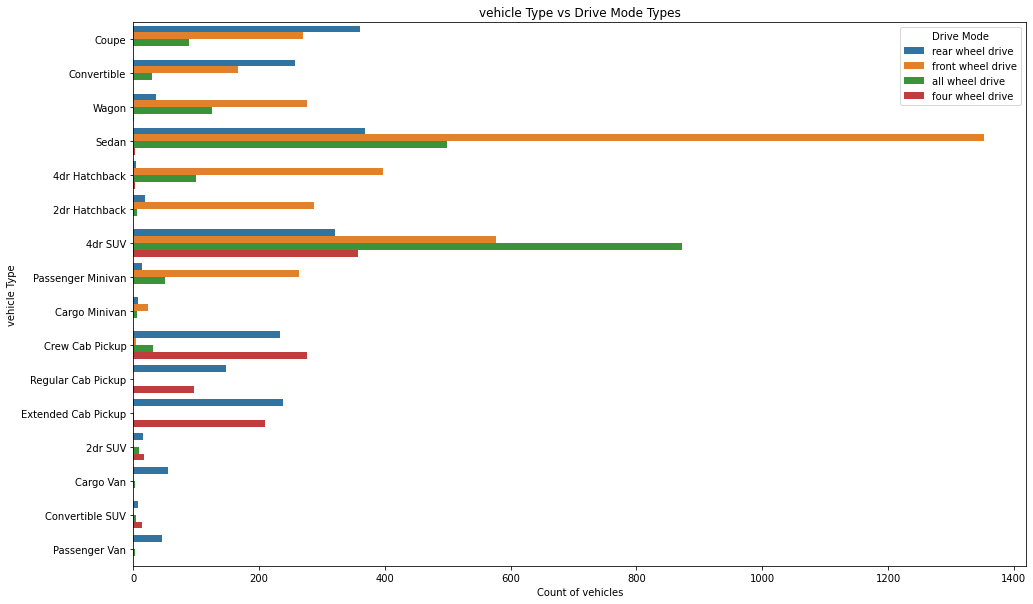

In [126]:
#Vehicle Style type and drive type analysis
plt.figure(figsize=(16,10))
sns.countplot(y='Vehicle Style',data=df,hue='Drive Mode')
plt.title("vehicle Type vs Drive Mode Types")
plt.ylabel("vehicle Type")
plt.xlabel("Count of vehicles")

# Making new group **Price_group**





In [49]:
#creating New column "Price_Group" and assign the value based on car price
df['Price_group']=pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000],labels=['<20k','20-30k','40-59k','60-79k','80-99k','>100k'],include_lowest=True)
df['Price_group']=df['Price_group'].astype(object)

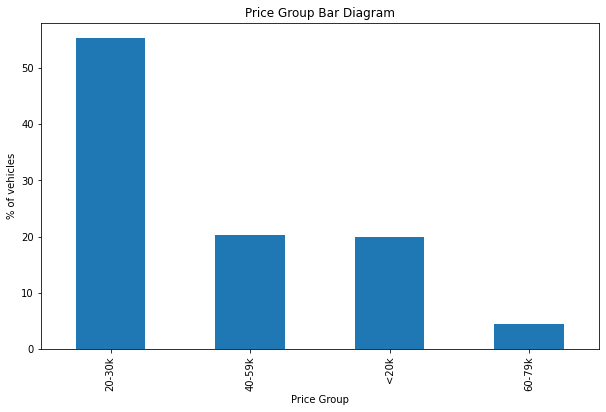

In [50]:
(df["Price_group"].value_counts()/len(df)*100).plot.bar(figsize=(10,6))
plt.title('Price Group Bar Diagram')
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

# **9.Splitting the dataset into 80 and 20 ratio and building a machine learning model with price as the target variable**

Separating X(Predictor Variables) and Y(Prediction Variable) from the dataset.

In [52]:
#taking Parameters
x=df[['Popularity','Year','HP','Cylinders','MPG-H','MPG-C']].values
y=df['Price'].values


Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

Min-Max Scaler,Standard Scaler,Robust Scaler

So we are using Standard scaling technique:



In [55]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
X=sc_x.fit_transform(x)
Y=sc_y.fit_transform(y.reshape(-1,1))



In [57]:
#splitting Dataset into Training set  and Testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


## **10.Trying different algorithms and check their performance over metrics like Rsquare, RMSE, MAE etc and document your findings**

Algorithms I will be using are:

1)Linear Regression

2)Polynomial Regression

3)Decision Tree Regressor

4)Random Forest Regressor



# **10.1 Linear Regression Model**

In [58]:
#Fitting Multiple Linear Regression to Training Set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

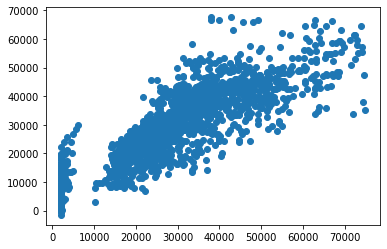

In [60]:
#predicting the test set results
y_pred=regressor.predict(X_test)
plt.scatter(y_test,y_pred)

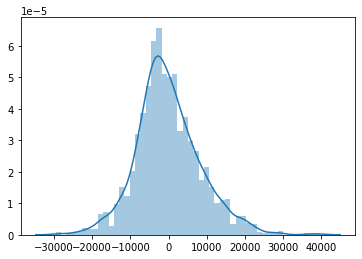

In [61]:
sns.distplot((y_test-y_pred),bins=50)

In [62]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 6445.603048695646
Root Mean Squared Error: 8446.828784305513
R2 Score: 0.6800475541161142


# **10.2 Polynomial Regression Model**

In [102]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
model = PolynomialFeatures(degree = 4)
XP = model.fit_transform(X_train)
model.fit(XP, y_train)
reg = LinearRegression()
reg.fit(XP, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

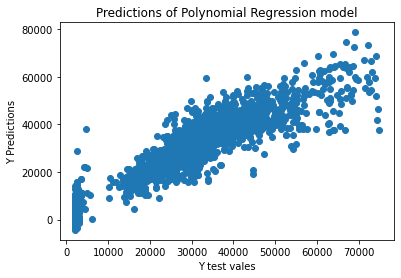

In [103]:
# Predicting a new result with Polynomial Regression
y_pred=reg.predict(model.fit_transform(X_test))
plt.title("Predictions of Polynomial Regression model")
plt.xlabel("Y test vales")
plt.ylabel("Y Predictions")
plt.scatter(y_test,y_pred)
plt.show()

In [104]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4780.773098795591
Root Mean Squared Error: 6588.9479572784985
R2 Score: 0.8053160242314692


# **10.3 Decision Tree Regressor**

In [105]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

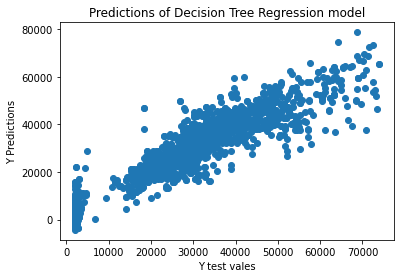

In [106]:
y_test=model.predict(X_test)
plt.title("Predictions of Decision Tree Regression model")
plt.xlabel("Y test vales")
plt.ylabel("Y Predictions")
plt.scatter(y_test,y_pred)
plt.show()


In [107]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4517.949966688709
Root Mean Squared Error: 6263.083576635798
R2 Score: 0.8208402452501922


# **10.4 Random Forest Regressor**

In [112]:

#Random Forest Regressior for the dataset
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 200, random_state = 0)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

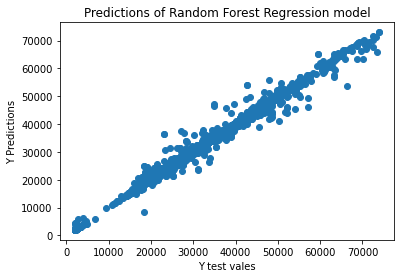

In [115]:
y_pred = model.predict(X_test)
plt.title("Predictions of Random Forest Regression model")
plt.xlabel("Y test vales")
plt.ylabel("Y Predictions")
plt.scatter(y_test,y_pred)
plt.show()

In [116]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 751.4143886275434
Root Mean Squared Error: 1675.9919733353572
R2 Score: 0.9871705536841423
